# Lecture 2

* Weighted linear regression (LOWESS/LOESS)
* Logistic regression
* Perceptron

Loading necessary libraries:

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

import numpy as np
import sklearn.datasets as ds

%matplotlib inline

# Weighted linear regression (LOWESS/LOESS)

Weighted linear regression is the algorithm that can help to get good results on nonlinear data. To show it we generate some nonlinear data first:

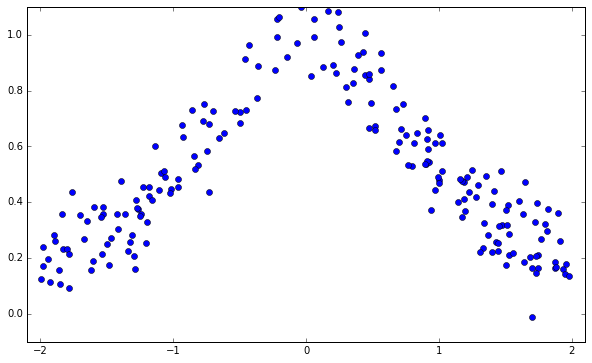

In [2]:
X_train = np.random.uniform(low = -2, high = 2, size=200)
y_train = 1.0/(1.0 + np.power(X_train,2)) + np.random.normal(size=len(X_train), scale=0.1)

fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-2.1, 2.1), ylim=(-0.1, 1.1))
ax.plot(X_train,y_train, 'o')
plt.show()

In the weighted linear regression we optimize the cost function
$$
\sum\limits_{i=1}^{m} w^{(i)} (y^{(i)} - \theta^T x^{(i)})^2,
$$
where
$$
w^{(i)} = \exp\left(-\dfrac{(x^{(i)} - x)^2}{2\tau^2}\right).
$$
We will use the stochastic gradient descent to find the best values of $\theta$.

In [52]:
def fit_loess(X_train, y_train, x, iters, alpha, tau):
    # add bias column to the design matrix
    X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train] 
    y_train = y_train.reshape((-1, 1))
    ### calculate weights for given parameter tau
    w = np.exp(-1.0/(2.0*tau**2)*(X_train - x)**2).reshape((-1,1))
    m = y_train.size # number of training examples
    theta = np.random.rand(2).reshape((-1,1)) # random start
    # the main loop by the number of iterations:
    for i in range(iters):
        pred = np.dot(X_train_bias, theta)
        error = np.multiply(w, pred - y_train)
        gradient = X_train_bias.T.dot(error)/m 
        theta = theta - alpha * gradient  # update weights
    return np.dot(np.array([1.0, x]).reshape((1,-1)), theta)[0]

Notice that we should fit the weighted linear regression for each test example separately.

In [59]:
alpha = 0.1 # set step-size
iters = 1000 # set number of iterations
tau = 0.2
X_test = np.arange(-2, 2, 0.01)
y_pred = [fit_loess(X_train, y_train, x, iters, alpha, tau) for x in X_test]

Finally, we plot our predictions along with the training examples.

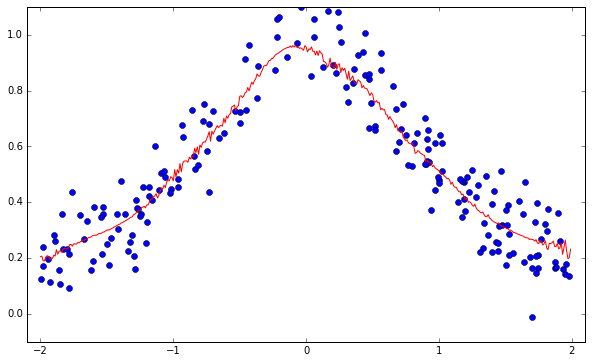

In [62]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-2.1, 2.1), ylim=(-0.1, 1.1))
ax.plot(X_train, y_train, 'o')
ax.plot(X_test, y_pred, color='r')
plt.show()

# Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression

Generate data with 100 samples and 2 features:

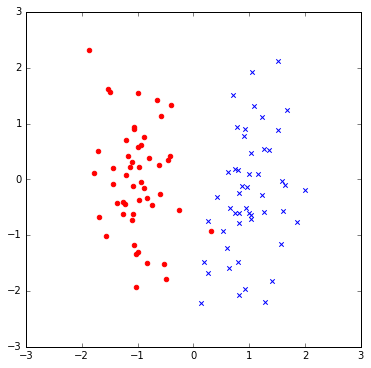

In [11]:
X,y = ds.make_classification(n_features=2, 
                             n_redundant=0, 
                             n_informative=1,
                             n_clusters_per_class=1,
                             random_state=3216)
ix0 = [i for i,x in enumerate(y) if x == 0]
ix1 = [i for i,x in enumerate(y) if x == 1]
fig = plt.figure(figsize=(6,6))
#ax = plt.axes(xlim=(-3.1, 3.1), ylim=(-3.1, 3.1))
plt.scatter(X[ix0,0],X[ix0, 1],marker='o',color='red')
plt.scatter(X[ix1,0],X[ix1, 1],marker='x',color='blue')
plt.show()

We will use built-in model:

In [3]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

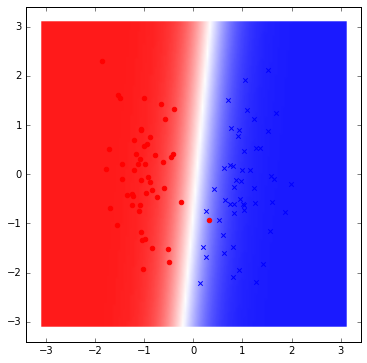

In [62]:
def sigmoid(x1, x2, th0, th1, th2):
    return -1.0/(1+np.exp(-th0 - x1*th1 - x2*th2))

x1 = np.arange(-3.1, 3.1, 0.05)
x2 = np.arange(-3.1, 3.1, 0.05)
x1,x2 = np.meshgrid(x1, x2)
y_pred = sigmoid(x1,x2,model.intercept_[0],model.coef_[0][0],model.coef_[0][1])
extent = -3.1, 3.1, -3.1, 3.1

fig = plt.figure(figsize=(10,6))
#ax = plt.axes(xlim=(-3.1, 3.1), ylim=(-3.1, 3.1))
plt.imshow(y_pred, cmap=cm.bwr, alpha=.9, interpolation='bilinear', extent = extent, origin='lower')
plt.scatter(X[ix0,0],X[ix0, 1],marker='o',color='red')
plt.scatter(X[ix1,0],X[ix1, 1],marker='x',color='blue')
plt.show()

# Perceptron

We train the perceptron algorithm on the same data:

In [4]:
from sklearn.linear_model import Perceptron

In [5]:
model = Perceptron()
model.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

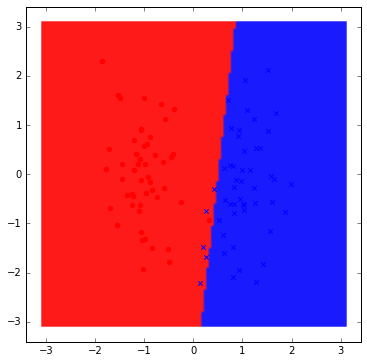

In [6]:
def heaviside(x1, x2, th0, th1, th2):
    return -np.sign(th0 + x1*th1 + x2*th2)

x1 = np.arange(-3.1, 3.1, 0.05)
x2 = np.arange(-3.1, 3.1, 0.05)
x1,x2 = np.meshgrid(x1, x2)
y_pred = heaviside(x1,x2,model.intercept_[0],model.coef_[0][0],model.coef_[0][1])
extent = -3.1, 3.1, -3.1, 3.1

fig = plt.figure(figsize=(10,6))
#ax = plt.axes(xlim=(-3.1, 3.1), ylim=(-3.1, 3.1))
plt.imshow(y_pred, cmap=cm.bwr, alpha=.9, interpolation='bilinear', extent = extent)
plt.scatter(X[ix0,0],X[ix0, 1],marker='o',color='red')
plt.scatter(X[ix1,0],X[ix1, 1],marker='x',color='blue')
plt.show()